# Final metrics for Guns

# Imports

In [1]:
import pandas as pd
from sklearn.metrics import classification_report, auc
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from seaborn import heatmap
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read files

In [2]:
files = '../data/results/results_v1.csv', '../data/results/results_v2.csv', '../data/results/results_v3.csv', '../data/results/results_v4.csv'
dfs = [pd.read_csv(file) for file in files]
dfs[0].head()

,filename,true_class,pred_class
0,I_CIDIMEC_Background_1.mp4,Background,Gun
1,I_CIDIMEC_Background_2.mp4,Background,Gun
2,I_CIDIMEC_Background_3.mp4,Background,Gun
3,I_CIDIMEC_Background_4.mp4,Background,Gun
4,I_CIDIMEC_Gun_1.mp4,Gun,Gun


## Replace every Knife for Not Gun

In [3]:
for df in dfs:
    df['true_class'] = [1 if x == 'Gun' else 0 for x in df['true_class']]
    df['pred_class'] = [1 if x == 'Gun' else 0 for x in df['pred_class']]
dfs[0].head()

,filename,true_class,pred_class
0,I_CIDIMEC_Background_1.mp4,0,1
1,I_CIDIMEC_Background_2.mp4,0,1
2,I_CIDIMEC_Background_3.mp4,0,1
3,I_CIDIMEC_Background_4.mp4,0,1
4,I_CIDIMEC_Gun_1.mp4,1,1


In [4]:
for i, df in enumerate(dfs):
    print("-"*50+f" Model {i+1} "+"-"*50)
    print(classification_report(df['true_class'], df['pred_class']))

-------------------------------------------------- Model 1 --------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.12      0.22        24
           1       0.43      1.00      0.60        16

    accuracy                           0.48        40
   macro avg       0.72      0.56      0.41        40
weighted avg       0.77      0.47      0.37        40

-------------------------------------------------- Model 2 --------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.28      0.41        25
           1       0.42      0.87      0.57        15

    accuracy                           0.50        40
   macro avg       0.60      0.57      0.49        40
weighted avg       0.64      0.50      0.47        40

-------------------------------------------------- Model 3 --------------------------------------------------
              pr

In [5]:
# Classification reports
print('Accuracy, Precision, Recall, F1-score, AUC')
for i, df in enumerate(dfs):
    # print: accuracy, precision, recall, f1-score, auc
    print(round(accuracy_score(df['true_class'], df['pred_class']), 2), end=',')
    print(round(precision_score(df['true_class'], df['pred_class'], average='macro'), 2), end=',')
    print(round(recall_score(df['true_class'], df['pred_class'], average='macro'), 2), end=',')
    print(round(f1_score(df['true_class'], df['pred_class'], average='macro'), 2), end=',')
    print(round(roc_auc_score([1 if x > 0 else 0 for x in df['true_class']], df['pred_class']), 2))
    

Accuracy, Precision, Recall, F1-score, AUC
0.48,0.72,0.56,0.41,0.56
0.5,0.6,0.57,0.49,0.57
0.75,0.74,0.74,0.74,0.74
0.62,0.61,0.61,0.61,0.61


## Confusion matrixes

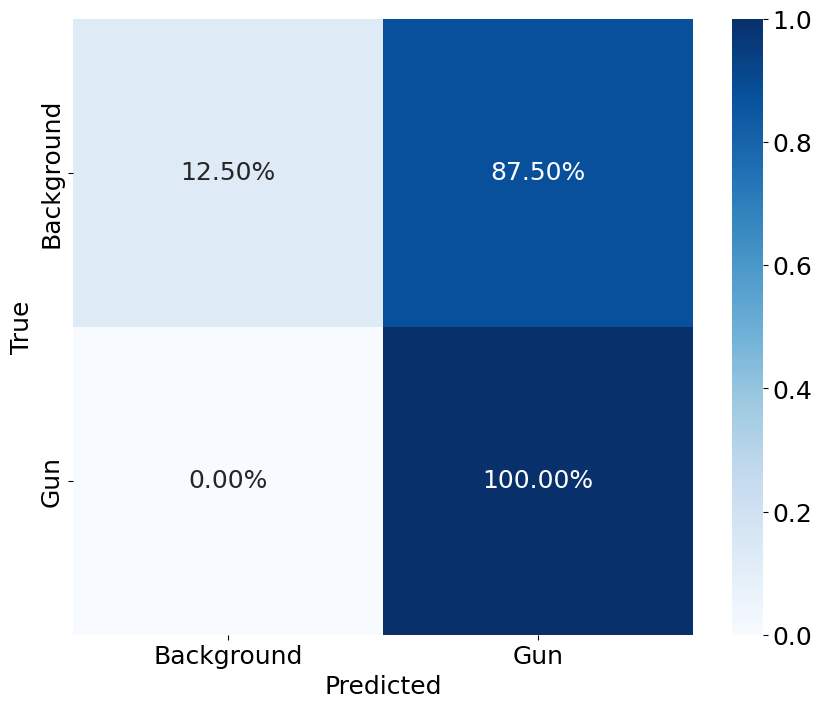

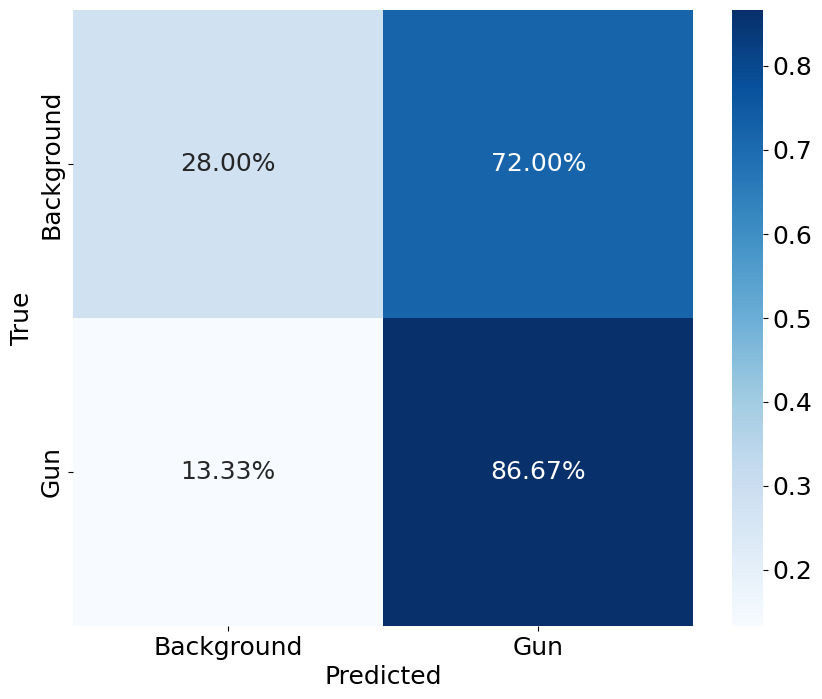

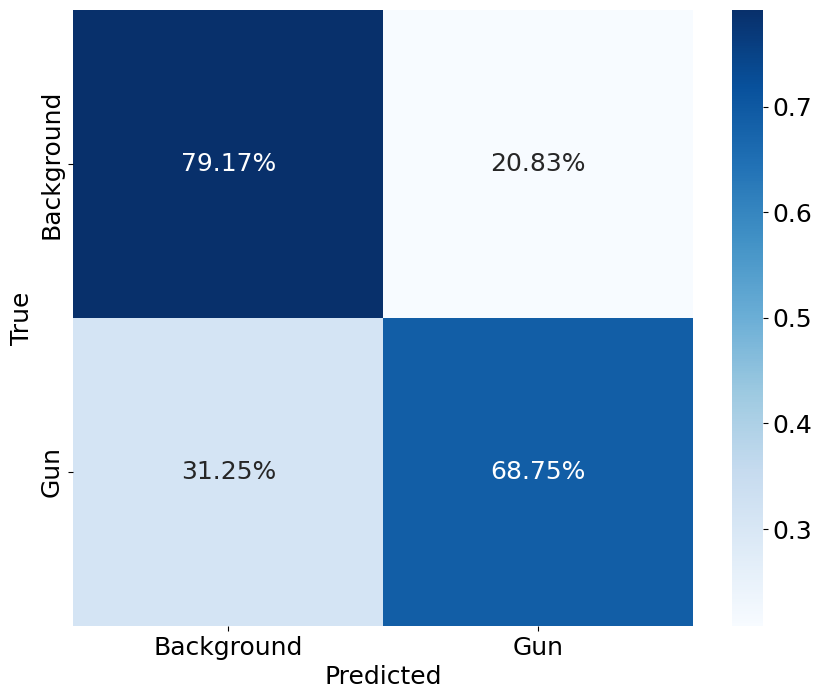

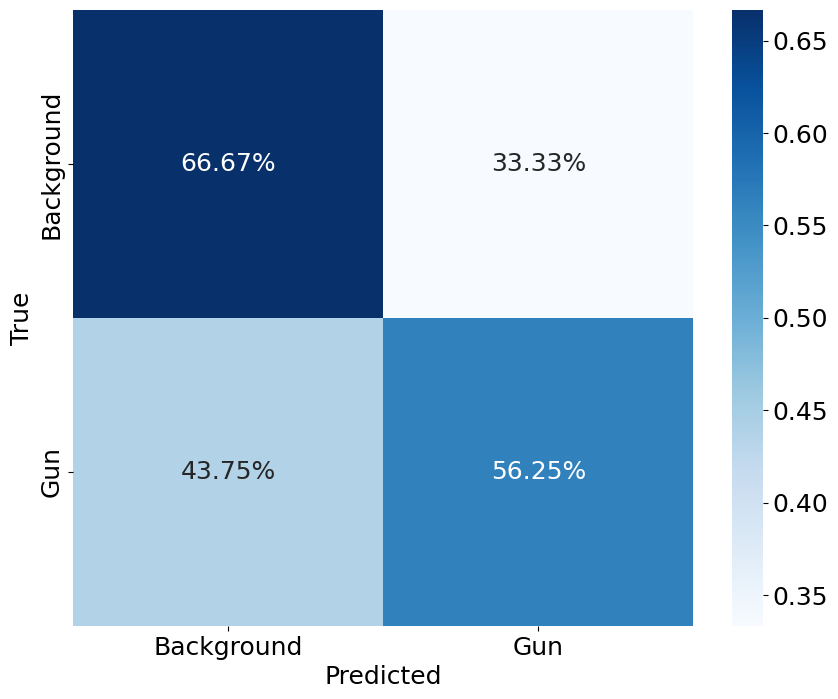

In [6]:
meanings = [
    "Roboflow inference server",
    "Roboflow inference server with background removal",
    "TensorRT with background removal",
    "TensorRT with background removal and grayscale"
]
for meaning, df in zip(meanings, dfs):
    confusion_matrix_percentage = pd.crosstab(df['true_class'], df['pred_class'], rownames=['True'], colnames=['Predicted'], margins=True, normalize='index')
    plt.figure(figsize=(10, 8))

    # Change axes by classnames: ['Background', 'Gun]
    confusion_matrix_percentage = confusion_matrix_percentage.rename(columns={0: 'Background', 1: 'Gun', 2: 'All'})
    confusion_matrix_percentage = confusion_matrix_percentage.rename(index={0: 'Background', 1: 'Gun', 2: 'All'})

    # Remove all column and row with 'All' class
    confusion_matrix_percentage = confusion_matrix_percentage.drop('All', axis=0)

    # Change font size
    plt.rcParams.update({'font.size': 18})

    # Plot heatmap
    heatmap(confusion_matrix_percentage, annot=True, fmt='.2%', cmap='Blues')
    # plt.title(f"Confusion matrix for {meaning}", pad=30, fontsize=20)